In [ ]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

$$\mathop{\mathbb{E}}[\log{S_T}]=\log{S_0}+r T - 1/2\sigma^2T$$ and $$\text{var}{[\log{S_T}]}=\sigma^2T$$

In [ ]:
class Simulation:
    
    def __init__(self, S_0, K, sigma, r, T):
        self.S_0 = S_0
        self.K = K
        self.sigma = sigma
        self.r = r
        self.T = T
        self.result = []
        
    def generate_price(self):
        sd = self.sigma * self.T ** 0.5
        mean = np.log(self.S_0) + self.r * self.T - 0.5 * (self.sigma**2) * self.T
        #S_T = sts.lognorm.rvs(s=sd,scale=np.exp(mean))
        S_T = np.random.lognormal(mean=mean,sigma=sd)
        C_T = max(S_T-self.K,0)
        C_0 = C_T * np.exp(-self.r*self.T)
        return C_0

    def simulate(self, n):
        # Simulate n times.
        for _ in range(n):
            self.result.append(self.generate_price())
        
        return np.mean(self.result)

S_0 = 129.87
K = 135
sigma = 0.2968
r = 0.0134
T = 35/365
    
MC = Simulation(S_0, K, sigma, r, T)
result = MC.simulate(n = 5000)

print("Option value from Monte Carlo:", result)

Option value from Monte Carlo: 2.7871619958757132


In [ ]:
def BS_call(S_0,T,r,K,sigma):
    ### Fill in the code below to calculate a call option price
    d_1 = (np.log(S_0/K)+(r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1-sigma*np.sqrt(T)
    C = S_0*sts.norm.cdf(d_1) - K*np.exp(-r*T)*sts.norm.cdf(d_2)
    return C

BS_call(S_0,T,r,K,sigma)

2.7696512095305508

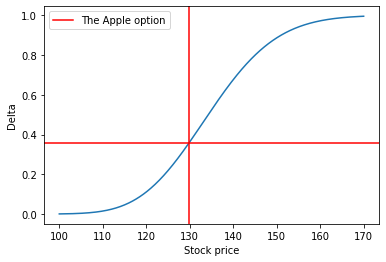

Delta of the Apple option: 0.3588311775092397


In [ ]:
S_0 = 129.87
K = 135
sigma = 0.2968
r = 0.0134
T = 35/365

def delta(S,K,r,sigma,T):
    d1 = (np.log(S/K)+(r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
    return sts.norm.cdf(d1)

apple_delta = delta(S_0,K,r,sigma,T)    
    
S = np.linspace(100,170,500)
plt.plot(S, delta(S,K,r,sigma,T))
plt.axvline(S_0,color='r',label='The Apple option')
plt.axhline(apple_delta,color='r')
plt.xlabel('Stock price')
plt.ylabel('Delta')
plt.legend()
plt.show()
print('Delta of the Apple option:', apple_delta)

In [ ]:

S_0 = 129.87
K = 135
sigma = 0.2968
r = 0.0134
T = 35/365

# I will give you the BS call option formula here
def BS_call(S_0,T,r,K,sigma):
    ### Fill in the code below to calculate a call option price
    d_1 = (np.log(S_0/K)+(r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1-sigma*np.sqrt(T)
    C = S_0*sts.norm.cdf(d_1) - K*np.exp(-r*T)*sts.norm.cdf(d_2)
    return C

## Suppose after 2 days, the stock price goes down to 125
T_new = (35-2)/365
S_new = 131

BS_call(S_new,T_new,r,K,sigma)-2.769651209

0.28792063671960744

In [ ]:
35.89 * 1.13

40.555699999999995